In [2]:
from PIL import Image
import numpy as np

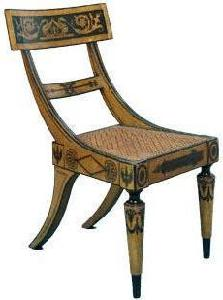

In [3]:
# chair의 이미지 해상도를 통일하여 적용하기 : Test
# chair의 1번 이비지
img = Image.open("../Data/chair/image_0001.jpg")
img

In [10]:
# 배열확인
print(np.array(img).shape)
print(np.array(img2).shape)

(300, 223, 3)
(300, 200, 3)


In [11]:
# chair의 2번 이비지
img2 = Image.open("../Data/chair/image_0002.jpg")


In [12]:
# Image의 해상도가 일정하지 않음
# 전체 이미지의 해상도의 최대값ㅇ르 가지고 적용해보자!
import glob

In [14]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [20]:
print('chair의 너비 최대 해상도 : ', np.mean(widthRatio))
print('chair의 높이 최대 해상도 : ', np.mean(heightRatio))

chair의 너비 최대 해상도 :  229.65
chair의 높이 최대 해상도 :  297.31666666666666


In [26]:
# 너비: 230,  높이 298 으로 정함 (짝수 사용)
#chair 이미지 해상도 변경 및 Gray Scale로 적용
i = 1
for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/chairNew/image_%04d.jpg"%i, "JPEG")
    i += 1



In [27]:
# 너비: 230,  높이 298 으로 정함 (짝수 사용)
# laptop 이미지 해상도 변경 및 Gray Scale로 적용
i = 1
for file in sorted(glob.glob("../Data/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/laptopNew/image_%04d.jpg"%i, "JPEG")
    i += 1


In [28]:
# chair Image를 numpy로 변경하기
number_of_data = 60
img_width_size = 230
img_height_size =298

In [29]:
chairData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape( number_of_data ,
          img_height_size,
          img_width_size
          )

In [31]:
i = 0
for file in sorted(glob.glob("../data/chairNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i +=1

In [33]:
chairData.shape

(60, 298, 230)

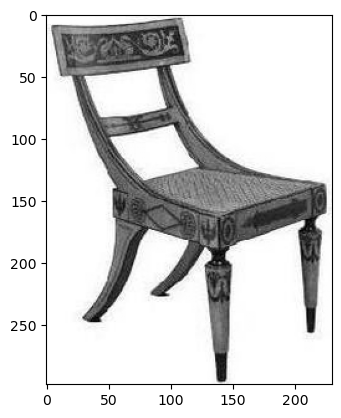

In [34]:
# 이미지 확인하기
import matplotlib.pyplot as plt
plt.imshow(chairData[0].reshape(298,230), cmap='gray')
plt.show()

In [35]:
# laptop
laptopData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape( number_of_data ,
          img_height_size,
          img_width_size
          )

In [36]:
i = 0
for file in sorted(glob.glob("../data/laptopNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    laptopData[i,:,:] = img
    i +=1

In [38]:
laptopData.shape

(60, 298, 230)

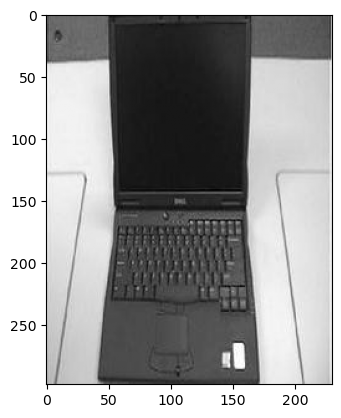

In [40]:
# 이미지 확인하기
import matplotlib.pyplot as plt
plt.imshow(laptopData[1].reshape(298,230), cmap='gray')
plt.show()

In [41]:
# numpy data를 train data로 합치기
train = np.concatenate(
    [chairData, laptopData]
)
train.shape

(120, 298, 230)

In [42]:
## target data 만들기
target = np.concatenate(
    [np.zeros(60), np.ones(60)]
)
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])